## 5.9　专题：主成分分析
在前面的内容里，我们详细介绍了有监督评估器：这些评估器对带标签的数据进行训练，从而预测新数据的标签。后面将介绍几个无监督评估器，这些评估器可以从无标签的数据中挖掘出有趣的信息。

这一节将介绍主成分分析（principal component analysis，PCA），它可能是应用最广的无监督算法之一。虽然PCA 是一种非常基础的降维算法，但它仍然是一个非常有用的工具，尤其适用于数据可视化、噪音过滤、特征抽取和特征工程等领域。我们首先简单介绍PCA算法的概念，再通过几个示例演示PCA 更高级的应用。还是先导入需要用的程序包：

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### 5.9.1　主成分分析简介
主成分分析是一个快速灵活的数据降维无监督方法，5.2 节已经对该算法作过初步介绍。下面来可视化一个包含200 个数据点的二维数据集，从而演示该算法的操作（如图5-80所示）：

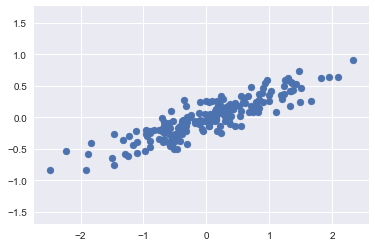

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

从图中可以看出，x 变量和y 变量显然具有线性关系，这使我们回想起5.6 节介绍的线性回归数据。但是这里的问题稍有不同：**与回归分析中希望根据x 值预测y 值的思路不同，无监督学习希望探索x 值和y 值之间的相关性**。

在主成分分析中，一种量化两变量间关系的方法是**在数据中找到一组主轴，并用这些主轴来描述数据集**。
<br>利用Scikit-Learn 的PCA 评估器，可以进行如下计算：

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

该拟合从数据中学习到了一些指标，其中最重要的是“成分”和“可解释差异”：

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


为了查看这些数字的含义，在数据图上将这些指标以向量形式画出来，用“成分”定义向量的方向，将“可解释差异”作为向量的平方长度（如图5-81 所示）：

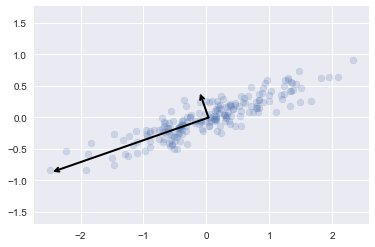

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# 画出数据
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

这些向量表示数据主轴，图5-81 的**箭头长度表示输入数据中各个轴的“重要程度”**——更准确地说，它**衡量了数据投影到主轴上的方差的大小**。每个数据点在主轴上的投影就是数据的“主成分”。
<br>如果将原始数据和这些主成分都画出来，将得到如图5-82 所示的结果。
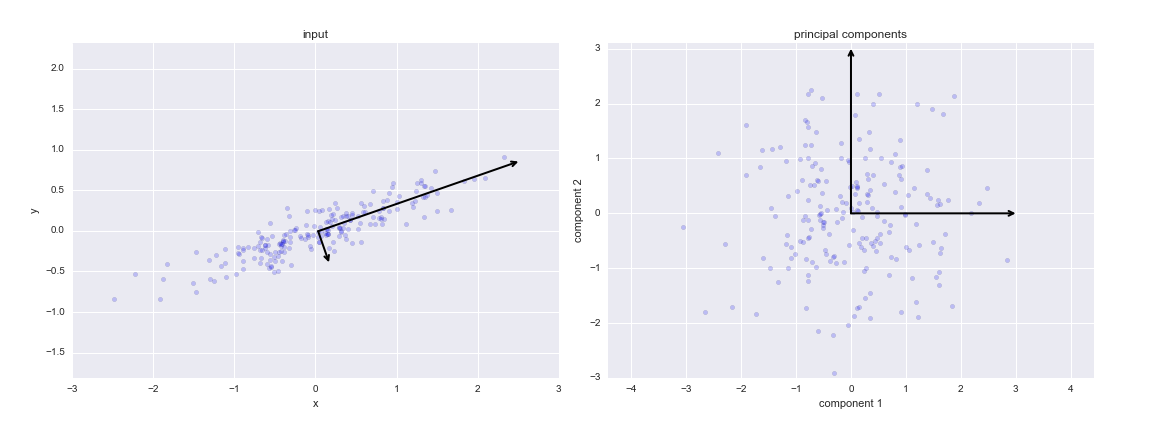

这种从数据的坐标轴变换到主轴的变换是一个仿射变换，仿射变换包含平移（translation）、旋转（rotation）和均匀缩放（uniform scaling）三个步骤。
虽然这个寻找主成分的算法看起来就像是在解数学谜题，但是主成分分析在现实的机器学习和数据探索中有着非常广泛的应用。
#### 1. 用PCA降维
用PCA 降维意味着去除一个或多个最小主成分，从而得到一个更低维度且保留最大数据方差的数据投影。一个利用PCA 作降维变换的示例如下所示：

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


变换的数据被投影到一个单一维度。为了理解降维的效果，我们来进行数据降维的逆变换，并且与原始数据一起画出（如图5-83 所示）：

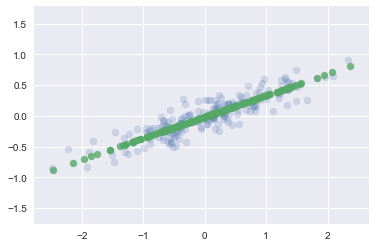

In [8]:
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

浅色的点是原始数据，深色的点是投影的版本。我们可以很清楚地看到**PCA 降维的含义：沿着最不重要的主轴的信息都被去除了，仅留下了含有最高方差值的数据成分**。被去除的那一小部分方差值（与主轴上分布的点成比例，如图5-83 所示）基本可以看成是数据在降维后损失的“信息”量。这种降维后的数据集在某种程度上足以体现数据中最主要的关系：虽然有50% 的数据维度被削减，但数据的总体关系仍然被大致保留了下来。
#### 2. 用PCA作数据可视化：手写数字
降维的有用之处在数据仅有两个维度时可能不是很明显，但是当数据维度很高时，它的价值就有所体现了。为了证明这一点，来介绍一个将PCA 用于手写数字数据的应用（详情请参见5.8 节）。

首先导入数据：

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

前面介绍过，该数据包含8 像素×8 像素的图像，也就是说它是64 维的。为了获得这些数据点间关系的直观感受，使用PCA 将这些数据投影到一个可操作的维度，比如说二维：

In [10]:
pca = PCA(2) # 从64维投影至二维
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


画出每个点的前两个主成分，更好地了解数据（如图5-84 所示）：

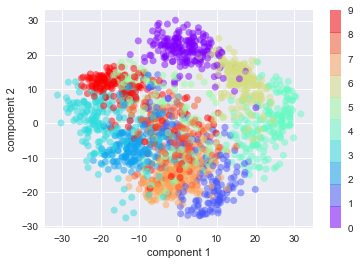

In [12]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

我们已经介绍过这些成分的含义：整个数据是一个64 维的点云，而且这些点还是每个数据点沿着最大方差方向的投影。我们找到了在64 维空间中最优的延伸和旋转方案，使得我们可以看到这些点在二维平面的布局。上述工作都是以无监督的方式进行的，即没有参考标签。

#### 3. 成分的含义

#### 4. 选择成分的数量
在实际使用PCA 的过程中，正确估计用于描述数据的成分的数量是非常重要的环节。我们可以将累计方差贡献率看作是关于成分数量的函数，从而确定所需成分的数量（如图5-87 所示）：

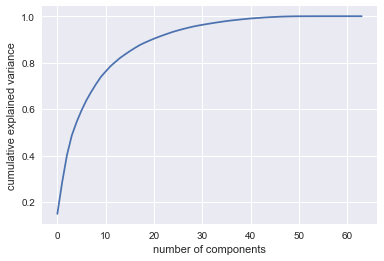

In [13]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

这个曲线量化了在前N 个主成份中包含了多少总的64 维的方差。例如，可以看到前10 个成分包含了几乎75% 的方差。因此，如果你希望描述接近100% 的方差，那么就需要大约50 个成分。

由图可知，二维的投影会损失很多信息（正如解释方差所表示的）。我们需要大约20 个成分来保持90% 的方差。从一个更高维的数据集来看这张图可以帮助你理解多次观察中冗余的水平。

### 5.9.2　用PCA作噪音过滤
PCA 也可以被用作噪音数据的过滤方法——**任何成分的方差都远大于噪音的方差**，所以相比于噪音，成分应该相对不受影响。因此，如果你仅用主成份的最大子集重构该数据，那么应该可以实现选择性保留信号并且丢弃噪音。

用手写数字数据看看如何实现噪音过滤。首先画出几个无噪音的输入数据（如图5-88所示）：

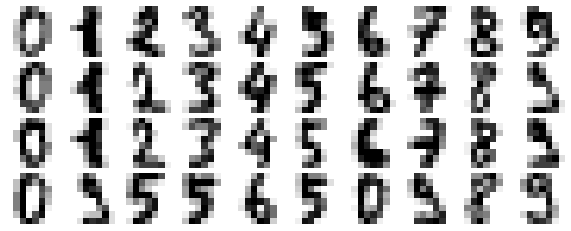

In [14]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

现在添加一些随机噪音并创建一个噪音数据集，重新画图（如图5-89 所示）：

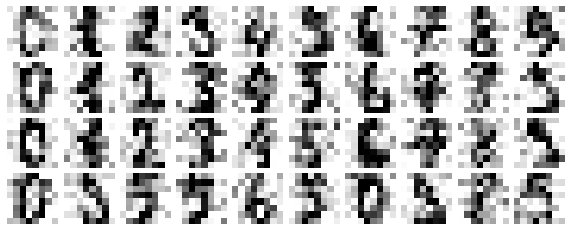

In [15]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

通过肉眼观察，可以很清楚地看到图像是带噪音的，也包含错误的像素。用噪音数据训练一个PCA，要求投影后保存50% 的方差：

In [16]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

这里50% 的方差对应12 个主成份。现在来计算出这些成分，然后利用逆变换重构过滤后的手写数字（如图5-90 所示）：

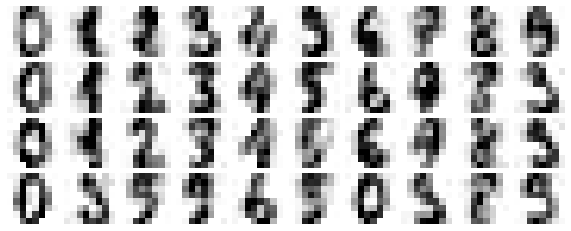

In [17]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

这个信号保留/ 噪音过滤的性质使PCA 成为一种非常有用的特征选择方式。例如，与其在很高维的数据上训练分类器，你可以选择在一个低维表示中训练分类器，该分类器将自动过滤输入数据中的随机噪音。

### 5.9.3　案例：特征脸
之前我们介绍过一个将PCA 投影结果作为特征选择器，用支持向量机做人脸识别的示例（详情请参见5.7 节），现在来回顾之前的内容，再探索一些新知识。回想一下Scikit-Learn中Wild 数据集带标签的人脸数据：

In [18]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


我们来看主轴，展开该数据集。因为这是一个非常大的数据集，所以我们将利用RandomizedPCA。它包含了一个随机方法来估计前N 个主成分，比标准的PCA 评估器速度更快，并且特别适用于高维数据（这里的维度将近3000）。来看看前150 个成分：

In [20]:
from sklearn.decomposition import PCA

pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

将这个例子中带有前面几个主成分的图像可视化是非常有趣的（这些成分被称作“特征向量”，因此这些图像的类型通常被称作“特征脸”）。正如你在图5-91 看到的，这些特征脸正如其名一样吓人：

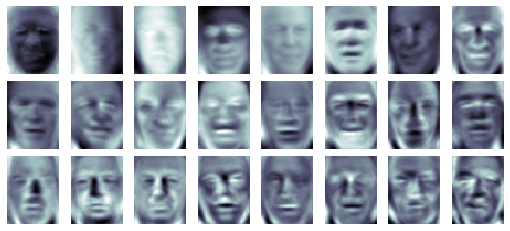

In [21]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

结果非常有趣。让我们先来观察一下图像之间的不同：前面几张特征脸（从左上角开始）看起来和照向脸的光线角度有关，而后面的主向量似乎是挑选出了特定的特征，例如眼睛、鼻子和嘴唇。来看看这些成分的累计方差，以及该投影保留了多少数据信息（如图5-92 所示）：

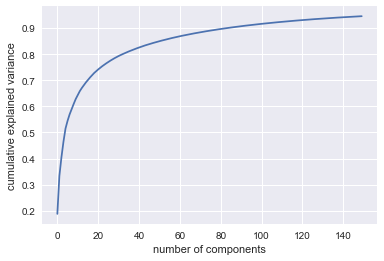

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

可以看到，这150 个成分包含了90% 的方差。这使我们相信，利用这150 个成分可以恢复数据的大部分必要特征。为了使以上结论更准确，可以比较输入图像和利用这150 个成分重构的图像（如图5-93 所示）：

In [24]:
# 计算成分和投影的人脸
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

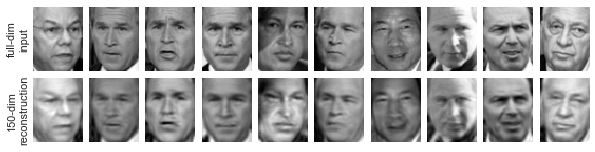

In [25]:
# 画出结果
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

上面一行显示的是输入图像，而下面一行显示的是从大约3000 个原始特征中精选出的50个特征重构的图像。这个可视化结果清楚地展示了为什么在5.7 节中的PCA 特征选择如此成功：虽然它将数据的原始维度信息缩减了将近20 倍，但是投影数据还是包含了足够的信息，使我们可以通过肉眼识别出图像中的人物。这说明我们的分类算法只需要在150 维的数据上训练，而不需要在3000 维的数据上训练。维度的选择取决于选定的算法，而选择合适的算法会带来更有效的分类效果。

### 5.9.4　主成分分析总结
这一节讨论了用主成分分析进行降维、高维数据的可视化、噪音过滤，以及高维数据的特征选择。由于PCA 用途广泛、可解释性强，所以可以有效应用于大量情景和学科中。对于任意高维的数据集，我倾向于以PCA 分析开始，可视化点间的关系（正如手写数字示例中的处理方式），理解数据中的主要方差（正如特征脸示例中的处理方式），理解固有的维度（通过画出解释方差比）。当然，PCA 并不是一个对每个高维数据集都有效的算法，但是它提供了一条直接且有效的路径，来获得对高维数据的洞察。

经常受数据集的异常点影响是PCA 的主要弱点。因为这个理由，很多效果更好的PCA 变体被开发出来，这些PCA 变体方法迭代执行，丢弃对原始成分描述得很糟糕的数据点。Scikit-Learn 中有一些有趣的PCA 变体，包括RandomizedPCA 和SparsePCA，这两个算法也在sklearn.decomposition 子模块中。
* RandomizedPCA 算法使用了一个非确定方法，快速地近似计算出一个维度非常高的数据的前几个主成分，
* 而SparsePCA 引入了一个正则项（详情请参见5.6 节）来保证成分的稀疏性。

在接下来的内容中，我们将学习其他无监督学习方法，加深对PCA 的理解。